In [ ]:
# LAB 1 : Multi-layer Perceptron  (MLP) and Convoutional Neural Network (CNN) in PyTorch
# Applied Deep Learning - IT4653
# School of Information and Communication Technology
# Hanoi University of Science and Technology


[EN]
<h3> Part 1 : Multi-Layer Perceptron (MLP) in PyTorch </h3>

In deep learning, a multilayer perceptron (MLP) is a modern feedforward neural network consisting of Fully Connected (FC) neurons with linear or nonlinear activation functions, organized in layers. This modern neural networks are trained using Gradient Descent algorithm (GD).

[VN]

<h3> Phần 1 : Lập trình mạng nơ ron perceptron đa tầng với PyTorch </h3>

Trong học sâu, một mạng nơ ron perceptron đa tầng (MLP) là một dạng mạng nơ ron truyền thẳng bao gồm các nơ ron kết nối đầy đủ (FC) với các hàm kích hoạt tuyến tính hoặc phi tuyến, được tổ chức dưới dạng các tầng. Dạng mạng nơ ron được huấn luyện dùng giải thuật tụt dốc vec tơ tiếp tuyến (GD).


[EN]

The famous MNIST dataset of handwritten digit recognition will be employed to build and train a Feed Forward Network (FFN) then a Convolutional Neural Network (CNN). The MNIST consists of 60K training images and 10K test images which were labeled by 10 digit classes from '0' to '9'. The MNIST dataset images are 28x28 pixels in size. Each image is a grayscale representation of a handwritten digit, with pixel values ranging from 0 (white) to 255 (black).  


[VN]

Bộ dữ liệu nhận dạng chữ số viết tay MNIST được sử dụng để xây dựng một mạng nơ ron truyền thẳng (FFN) và một mạng nơ ron tích chập (CNN). Bộ dữ liệu MNIST gồm có 60K hình ảnh huấn luyện và 10K hình ảnh kiểm tra chúng đã được gán bởi mười nhãn là các chữ số từ '0' đến '9'. Hình ảnh trong bộ dữ liệu MNIST kích thước là 28x28 điểm ảnh. Mỗi hình ảnh là một biểu diễn đen trắng của một ký tự số, với giá trị điểm ảnh là số nguyên chạy từ 0 (trắng) đến 255 (đen).   









[EN]

<h3> MNIST dataset loader </h3>

We need download the MNIST dataset from torchvision.datasets then transform it to tensors and then use torch.utils.data.Dataloader

[VN]


<h3> Tải bộ dữ liệu MNIST </h3>

Ta cần tải bộ dữ liệu MNIST xuống từ torchvision.datasets, chuyển đổi nó sang biểu diễn tensor và sau đó lưu vào lớp torch.utils.data.Dataloader


In [ ]:
# for MNIST dataset
# dành cho dữ liệu MNIST
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Download and transform the MNIST dataset
# Tải xuống và biến đổi bộ dữ liệu về dạng tensor
transform = transforms.Compose([
    # Convert images to PyTorch tensors which also scales data from [0, 255] to [0., 1.]
    # Chuyển đổi hình ảnh sang tensor PyTorch và chuẩn hoá số nguyên [0, 255]về giá trị số thực [0.,1.]
    transforms.ToTensor()
])

# Download training and test datasets
# Tải xuống hai bộ dữ liệu huấn luyện và kiểm tra
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
# Create DataLoaders for batch processing ready to SGD (Stochastic Gradient Descent)
# Tạo bộ tải dữ liệu sắn sàng cho kích thước bó sẵn sàng cho SGD
BATCH_SIZE = 64
trainset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
testset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

[EN]

Let's build a simple MLP architecture of only one hidden layer

1. Input layer is a flatten of 28x28 pixel values
2. Hidden layer is a linear of 256 neurons whose activation function is tanh
3. Output layer is a softmax of 10 class neurons


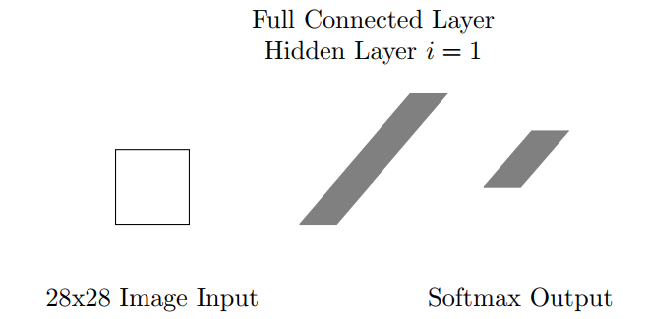


[VN]

Hãy xây dựng một mạng nơ ron perceptron đa tầng đơn giản gồm chỉ một lớp ẩn có kiến trúc như sau

1. Lớp vào là làm phẳng giá trị 28x28 điểm ảnh
2. Lớp ẩn có kích thước gồm 256 nơ ron xếp chồng với hàm kích hoạt là hàm tanh
3. Lớp ra softmax gồm có 10 nơ ron chỉ lớp

















[EN]

<h3> Build a simple MLP </h3>

In subclass way, we wrapper our model by subclassing the base class torch.nn as usual

[EN]

<h3> Xây dựng mạng nơ ron perceptron (MLP) đơn giản  </h3>

Bằng cách tạo lớp con, ta gói mô hình mạng nơ ron và lớp con của lớp cơ sở torch.nn như bình thường


In [ ]:
# Import PyTorch and other relevant libraries
# Nhập thư viện PyTorch và các thư viện liên quan
import torch
import torch.nn as nn
import torch.optim as optim


# Define the fully connected model
# Định nghĩa mạng kết nối đầy đủ
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)

        # TODO: Define the activation function for the first fully connected layer
        # TODO: Định nghĩa hàm kích hoạt cho lớp kết nối đầy đủ
        self.tanh = # TODO

        # TODO: Define the second Linear layer to output the classification probabilities
        # TODO: Định nghĩa lớp tuyến tính thứ hai với đầu ra xác suất
        self.fc2 = # TODO

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)

        # TODO: Implement the rest of forward pass of the model using the defined layers above
        # TODO: Cài đặt phần còn lại bước tiến của mô hình dùng các tầng đã định nghĩa ở trên
        return x


[EN]

## Selecting device

Let's select your device in preferring to GPU then send the model to run on it

[VN]

Hãy lựa chọn thiết bị phần cứng ưu tiên GPU sau đó gửi mô hình cho nó để chạy






In [ ]:
# selecting device
# lựa chọn thiết bị
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
# send the model to GPU
# gửi mô hình cho GPU
mlp_model = MLPModel().to(device)

Device: cuda


[EN]

<h3>  Determine loss function and select optimizer </h3>

Before training the model, we need to define loss function and to select optimizer.

[VN]

<h3>  Định nghĩa hàm mất mát và lựu chọn bộ tối ưu </h3>

Trước khi huấn luyện mô hình, ta cần định nghĩa hàm mất mát và lựa chọn bộ tối ưu.












In [ ]:
# Define loss function and optimizer
# Định nghĩa hàm mất mát và bộ tối ưu
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp_model.parameters(), lr=1e-3)

[EN]

<h3> Train model </h3>

Our model is now ready to perform training process which involve feeding the dataset into the subclass, and then learning it in associations between images and labels. The dataset consists of pairs (image, label) that we access iteratively in batch mode.


[VN]


<h3> Huấn luyện mô hình </h3>

Mô hình đã sẵn sàng để thực hiện quy trình huấn luyện theo đó dữ liệu huấn luyện sẽ được gửi cho mô hình, sau đó học nó bằng cách kết hợp giữa hình ảnh và nhãn được gán. Bộ dữ liệu gồm các cặp (hình ảnh, nhãn) mà ta truy cập lặp theo chế độ bó.



In [ ]:
# Train model
# Huấn luyện mô hình

# Set number of loops
# Xác lặp số vòng lặp
num_epochs = 5
# Set the model to training mode
# Xác lập chế độ huấn luyện
mlp_model.train()
# Loop
# Vòng lặp
for epoch in range(num_epochs):
 total_loss = 0

 for images, labels in train_dataset:
  # Move tensors to GPU so compatible with model
  # Chuyển tensor sang GPU để chạy mô hình
  images, labels = images.to(device), labels.to(device)
  # Forward pass
  # Bước tiến
  outputs = mlp_model(images)

  # Calculate loss based on model predictions
  # Tính toán mất mát dựa theo kết quả dự đoán
  loss = loss_function(outputs, labels)
  # Clear gradients before performing backward pass
  # Xoá đạo hàm trước khi lan truyển ngược
  optimizer.zero_grad()
  # Automation backpropagate
  # Lan truyền ngược tự động
  loss.backward()
  # update model parameters
  # cập nhật tham số
  optimizer.step()

  # multiply loss by total number of samples in batch
  # nhân giá trị mất mát với kích thước mẫu ảnh trong bó
  total_loss += loss.item()*images.size(0)

 # Compute metrics
 print(f"Epoch %d , Loss: %6.5f "%(epoch + 1,total_loss))

[EN]

<h1> Part 2 : A Convolutional Neural Network (CNN) in PyTorch </h1>

A Convolutional Neural Network (CNN) is a type of deep learning model, inspired by the human visual cortex, designed to process data most commonly images or videos. CNNs use specialized layers, including convolutional and pooling layers, to automatically learn highly effective for tasks such as image recognition, object detection, and natural language processing related to visual data.



[VN]

<h1> Phần 2 : Mạng nơ ron tích chập (CNN) với PyTorch </h1>

Một mạng nơ ron tích chập (CNN) là một dạng mạng nơ ron học sâu, lấy cảm hứng từ trung khu thần kinh thị giác của con người, thiết kế để xử lý dữ liệu thường biểu diễn hình ảnh hay đoạn video. Mạng nơ ron cũng dùng cách biểu diễn theo tầng, gồm các tầng tích chập và tầng giảm mẫu, để tự động học hiệu quả cao với các tác vụ như nhận điện hình ảnh, phát hiện đổi tượng và xử lý ngôn ngữ tự nhiên liên quan đến dữ liệu trực quan.




[EN]


<h3> Build a CNN </h3>

Let's build a CNN architecture of three hidden layers

1. Input layer is a tensor of 28x28 image values
2. Hidden layer is a convolutional layer of 7x7 kernel size, stride=1, padding=0 with no. of filters=128 with activation function is ReLU
3. Hidden layer is a max pooling layer of 3x3 kernel size, stride=2, padding=0
4. Hidden layer is a Linear of 64 column neurons, after flattening the previous layer outputs, with activation is ReLU
5. Output layer is a softmax of 10 class neurons  


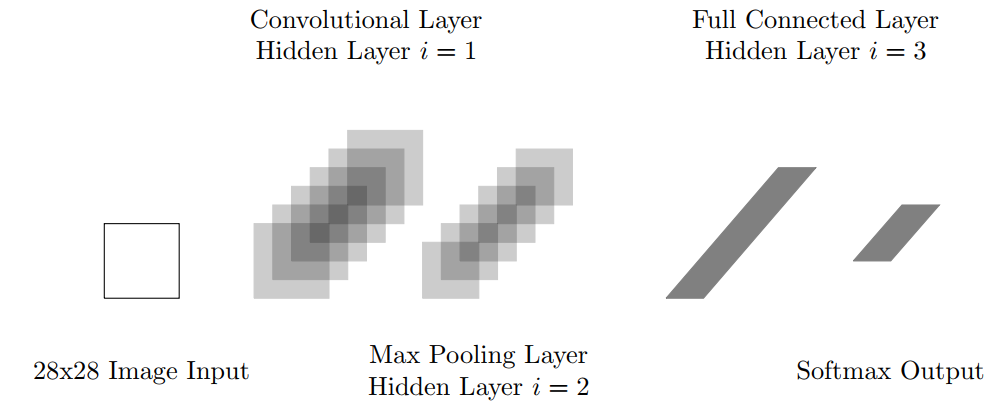



[VN]

<h3> Xây dựng một mạng nơ ron tích chập </h3>


Hãy xây dựng một mạng nơ ron tích chập gồm ba tầng ẩn

1. Tầng vào là một tensor kích thước 28x28 tương ứng hình ảnh đầu vào
2. Tầng ẩn là tầng tích chập gồm nhân kích thước 7x7, bước nhẩy=1, không thêm viền với số bộ lọc là 128 với hàm kích hoạt là ReLU
3. Tầng ẩn là tầng giảm mẫu max gồm nhân kích thước 3x3, bước nhẩy=2, không thêm viền
4. Tầng ẩn tuyến tính gồm 64 nơ ron, sau khi làm phẳng đầu ra của tầng trước, với hàm kích hoạt tanh
5. Tầng ra là tầng softmax gồm 10 nơ ron chỉ lớp













In [ ]:
# A Convolutional Neural Network
# Một mạng nơ ron tích chập

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # TODO: Define the convolutional layer
        # TODO: Định nghĩa lớp ẩn tích chập
        self.conv1 = # TODO

        # TODO: Define the max pooling layer
        # TODO: Định nghĩa lớp giảm mẫu max
        self.pool1 = # TODO

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear('''TODO''', 64)
        self.relu = nn.ReLU()

        # TODO: Define the Linear layer that outputs the classification
        # TODO: Định nghĩa lớp tuyến tính tạo đầu ra softmax
        self.fc2 = # TODO


    def forward(self, x):
        # convolutional and pooling layers
        # tầng tích chập và giảm mẫu
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)

        # TODO: Implement the rest of forward pass
        # TODO: Cài đặt phần còn lại của bước tiến
        '''TODO'''

        return x

# Create the model by calling the subclass
# Tạo mô hình bằng cách gọi lớp con
cnn_model = CNN().to(device)

[EN]

The rest implementation will be nearly the same as the part 1

[VN]

Phần cài đặt còn lại sẽ gần như giống hệt phần 1





In [ ]:
# Define loss function and optimizer
# Định nghĩa hàm mất mát và bộ tối ưu
# TODO:

In [ ]:
# Train model
# Huấn luyện mô hình
# TODO:

[EN]

<h3> Evaluate accuracy of the trained models on the test dataset </h3>

After having trained the models, they could asked to make predictions on the test dataset. The testset_loader will be employed to evaluate accuracy of our models by checking the match between their predictions and the test labels.

[VN]

<h3> Đánh giá độ chính xác của các mô hình đã huấn luyện trên tập dữ liệu kiểm tra </h3>

Sau khi thực hiện huấn luyện các mô hình, chúng được yêu cầu tạo các dự đoán trên tập kiểm tra. Bộ tải testset_loader được sử dụng để đánh giá độ chính xác của các mô hình bằng cách kiểm tra sự giống nhau giữa các giá trị dự đoán và nhãn kiểm tra.


In [ ]:
# Evaluate model performance on the test dataset, either MLP or CNN
# Đánh giá hiệu quả mô hình trên tập kiểm tra, hoặc MLP hoặc CNN
model.eval()
correct_pred = 0
# Disable gradient calculations when in inference mode
# Không tính đạo hàm trong khi suy dẫn
with torch.no_grad():
  for images, labels in testset_loader:
    # TODO: ensure evaluation happens on the GPU
    # TODO: cần chắc đánh giá thực hiện trên GPU
    images, labels = # TODO
    # TODO: feed the images into the model and obtain the predictions (forward pass)
    # TODO: đưa hình ảnh vào mô hình và lấy kết quả dự đoán (bước tiến)
    outputs = # TODO

    loss = loss_function(outputs, labels)

    # TODO: identify the digit with the highest probability prediction
    # TODO: xác định chữ số dự đoán với xác suất dự đoán cao nhất
    predicted = # torch.argmax('''TODO''')

    # TODO: tally the number of correct predictions
    # TODO: cộng các dự đoán đúng
    correct_pred += #TODO

    # TODO: tally the total number of predictions
    # TODO: cộng tổng các dự đoán
    total_pred += #TODO

# Compute average accuracy
# Tính giá trị trung bình độ chính xác
test_acc = correct_pred / total_pred

